In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Study data files
age_group = "data/cdph-age.csv"


# Read the Vaccination Case per Age and the Mortality Case results
age_group1 = pd.read_csv(age_group)
age_group1

,date,age,confirmed_cases_total,confirmed_cases_percent,deaths_total,deaths_percent
0,2021-08-04,0-4,94852,0.024,7,0.000
1,2021-08-04,0-4,94852,0.024,7,0.000
2,2021-08-04,5-17,420696,0.108,23,0.000
3,2021-08-04,5-17,420696,0.108,23,0.000
4,2021-08-04,18-34,1319796,0.338,932,0.015
...,...,...,...,...,...,...
36015,2020-05-21,80+,6740,0.076,1656,0.467
36016,2020-05-21,80+,6740,0.076,1656,0.467
36017,2020-05-21,80+,6740,0.076,1656,0.467
36018,2020-05-21,80+,6740,0.076,1656,0.467


In [3]:
#Drop all duplicate Values
clean_df = age_group1.drop_duplicates(subset=['age'])
clean_df

,date,age,confirmed_cases_total,confirmed_cases_percent,deaths_total,deaths_percent
0,2021-08-04,0-4,94852,0.024,7,0.000
2,2021-08-04,5-17,420696,0.108,23,0.000
4,2021-08-04,18-34,1319796,0.338,932,0.015
6,2021-08-04,35-49,926899,0.238,3489,0.054
8,2021-08-04,50-59,531177,0.136,6904,0.108
10,2021-08-04,60-64,199351,0.051,5921,0.092
12,2021-08-04,65-69,136874,0.035,6831,0.106
14,2021-08-04,70-74,94816,0.024,7476,0.116
16,2021-08-04,75-79,62896,0.016,7635,0.119
18,2021-08-04,80+,109491,0.028,24980,0.389


In [4]:
age_list = clean_df.groupby('age').sum()
age_list

,confirmed_cases_total,confirmed_cases_percent,deaths_total,deaths_percent
age,,,,
0-4,94852,0.024,7,0.000
18-34,1319796,0.338,932,0.015
35-49,926899,0.238,3489,0.054
5-17,420696,0.108,23,0.000
50-59,531177,0.136,6904,0.108
60-64,199351,0.051,5921,0.092
65-69,136874,0.035,6831,0.106
70-74,94816,0.024,7476,0.116
75-79,62896,0.016,7635,0.119


In [5]:
#Create Death Rate List 
death_rate_list = clean_df.groupby('age')['deaths_percent'].sum().tolist()
death_rate_list

[0.0, 0.015, 0.054, 0.0, 0.108, 0.092, 0.106, 0.116, 0.119, 0.389]

In [6]:
#Create Confirmed Cases Rate 
cases_rate_list = clean_df.groupby('age')['confirmed_cases_percent'].sum().tolist()
cases_rate_list



[0.024, 0.338, 0.238, 0.108, 0.136, 0.051, 0.035, 0.024, 0.016, 0.028]

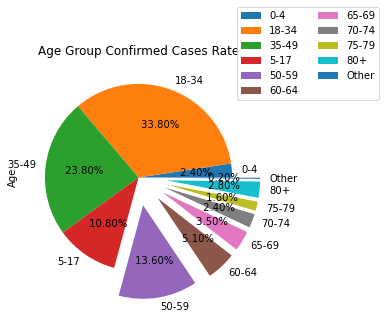

In [7]:
#Generate an Exploded Pie Chart Showing the percentage of Confirmed Covid Cases by Age Groups 
pie_chart_confirmed_cases = clean_df.groupby('age')['confirmed_cases_percent'].sum()
pie_chart_confirmed_cases 

#Account for only Age Groups with confirmated cases more than 0 
pie_chart3 = pie_chart_confirmed_cases.loc[pie_chart_confirmed_cases > 0]

#(Test) If total Sum isn't 1 or 100% create a label titled "Other"
pie_chart3["Other"]= 1 - pie_chart3.sum()

#Parameters
explode = [0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
pie_chart3.plot.pie(label=('Age'), explode=explode, title = "Age Group Confirmed Cases Rate", autopct="% .2f%%", normalize=True)
plt.tight_layout()
plt.legend(bbox_to_anchor =(0.90, 1.25), ncol = 2)
plt.savefig("images/Pie_Chart_Confirmed_Cases.png", dpi=180, bbox_inches="tight")
plt.show()



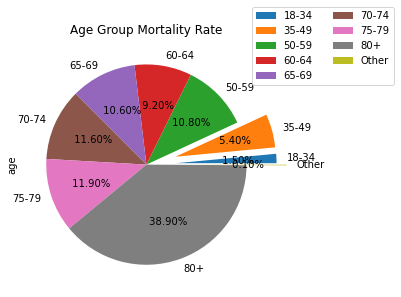

In [8]:
#Generate an Exploded Pie Chart Showing the percentage of Confirmed Deaths caused due to Covid by Age Groups 

pie_chart1 = clean_df.groupby('age')['deaths_percent'].sum()

#Account for only Age Groups with confirmated deaths more than 0 
pie_chart2 = pie_chart1.loc[pie_chart1 > 0]

#(Test) If total Sum isn't 1 or 100% create a label titled "Other"
pie_chart2["Other"]= 1 - pie_chart2.sum()

#Parameters
explode = [0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4]

pie_chart2.plot.pie(label=('age'), explode=explode, title = "Age Group Mortality Rate", autopct="% .2f%%") 
plt.tight_layout()
plt.legend(bbox_to_anchor =(0.90, 1.15), ncol = 2)
plt.savefig("images/Pie_Chart_Mortality_Rate.png", dpi=180, bbox_inches="tight")
plt.show()



In [9]:
#Check if Age Group Mortality percentages = 100
pie_chart2.loc[pie_chart2 > 0].sum()

1.0

In [10]:
#Check if Age Group Confrimed Cases =100
pie_chart3.loc[pie_chart3 >0].sum()

1.0

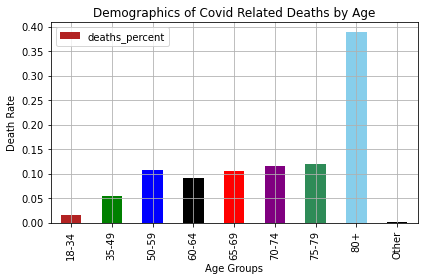

In [11]:
#Create a Bar Chat Showing the percentage of Confirmed Deaths caused due to Covid by Age Groups 

color = ['firebrick', 'green', 'blue', 'black', 'red',
                    'purple', 'seagreen', 'skyblue', 'black', 'tomato', 'pink']
barchart_D = pie_chart2.plot(kind="bar", title ="Demographics of Covid Related Deaths by Age", color=color)
barchart_D.set_xlabel("Age Groups")
barchart_D.set_ylabel("Death Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/Bar_Chart_Mortality_Rate.png", dpi=180, bbox_inches="tight")
plt.show()

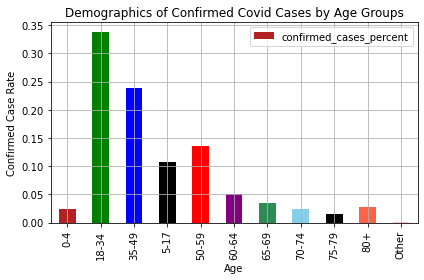

In [13]:
#Generate an Exploded Bar Chart Showing the percentage of Confirmed Covid Cases by Age Groups 

color = ['firebrick', 'green', 'blue', 'black', 'red',
                    'purple', 'seagreen', 'skyblue', 'black', 'tomato', 'pink']
barchart = pie_chart3.plot(kind="bar", title ="Demographics of Confirmed Covid Cases by Age Groups", color=color)
barchart.set_xlabel("Age")
barchart.set_ylabel("Confirmed Case Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("images/Bar_Chart_Confirmed_Case_Rate.png", dpi=180, bbox_inches="tight")
plt.show()